In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from utils.plots import get_image

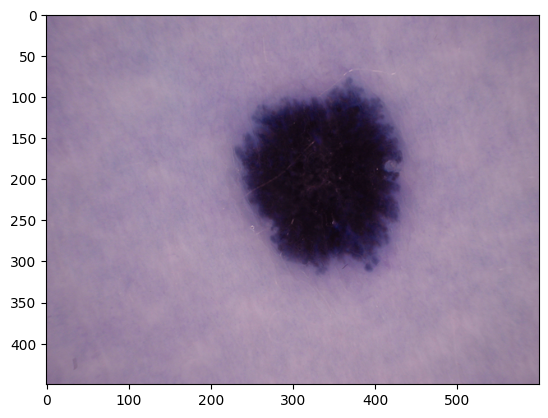

In [13]:
image_name = "nev00001.jpg"
image = cv2.imread(f'./data/binary/train/nevus/{image_name}', cv2.IMREAD_COLOR)
plt.imshow(image)

In [15]:
image.shape

(450, 600, 3)

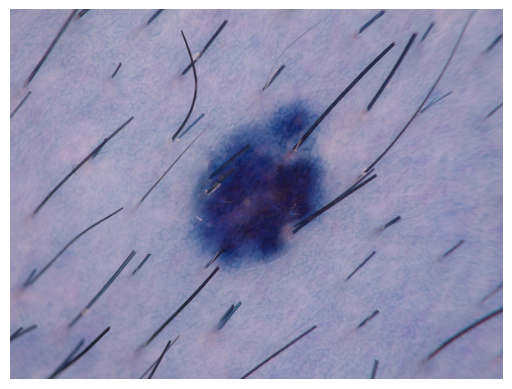

In [3]:
path = './data/binary/train/nevus/'
image_num = "00008"
image = get_image(image_num, path)

In [9]:
image

array([[[138, 137, 171],
        [137, 138, 172],
        [135, 143, 173],
        ...,
        [138, 140, 175],
        [145, 147, 178],
        [151, 147, 182]],

       [[135, 137, 172],
        [131, 138, 171],
        [134, 141, 174],
        ...,
        [144, 145, 179],
        [147, 148, 182],
        [149, 148, 180]],

       [[133, 139, 174],
        [139, 142, 173],
        [138, 141, 172],
        ...,
        [145, 147, 181],
        [142, 144, 179],
        [140, 143, 174]],

       ...,

       [[140, 133, 170],
        [135, 134, 168],
        [135, 133, 169],
        ...,
        [135, 137, 172],
        [134, 136, 170],
        [135, 137, 171]],

       [[135, 133, 169],
        [133, 134, 168],
        [132, 132, 168],
        ...,
        [135, 137, 172],
        [136, 138, 173],
        [135, 137, 172]],

       [[136, 134, 170],
        [136, 135, 169],
        [135, 133, 169],
        ...,
        [133, 135, 170],
        [135, 137, 172],
        [135, 137, 172]]

(array([4.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00, 1.0000e+00,
        5.0000e+00, 1.3000e+01, 2.5000e+01, 2.5000e+01, 7.4000e+01,
        1.6300e+02, 3.4200e+02, 5.3000e+02, 3.2700e+02, 7.7400e+02,
        1.0110e+03, 1.1140e+03, 5.7600e+02, 1.0020e+03, 9.2200e+02,
        9.4500e+02, 5.2100e+02, 9.8400e+02, 1.0230e+03, 9.3200e+02,
        9.6300e+02, 4.6500e+02, 9.2500e+02, 8.8100e+02, 8.5400e+02,
        3.5700e+02, 6.1600e+02, 5.4500e+02, 5.7000e+02, 2.9300e+02,
        6.0600e+02, 6.4600e+02, 6.6300e+02, 7.4500e+02, 3.9300e+02,
        7.9200e+02, 7.2800e+02, 7.0900e+02, 3.6100e+02, 7.0400e+02,
        7.9700e+02, 7.5700e+02, 3.6000e+02, 7.4400e+02, 7.2100e+02,
        6.9400e+02, 6.6800e+02, 3.4100e+02, 6.7000e+02, 6.3600e+02,
        6.5800e+02, 3.3100e+02, 6.1800e+02, 6.3200e+02, 6.4300e+02,
        3.3000e+02, 6.5200e+02, 6.8500e+02, 6.6900e+02, 8.1000e+02,
        3.9900e+02, 9.7200e+02, 1.1520e+03, 1.3250e+03, 8.5000e+02,
        2.1190e+03, 3.0060e+03, 4.4640e+03, 2.79

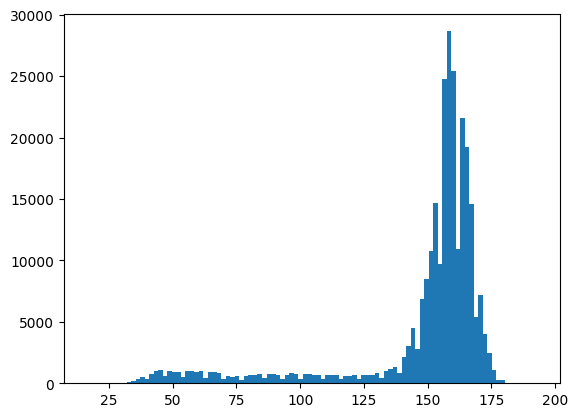

In [5]:
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.hist(image_gs.flatten(),bins=100)

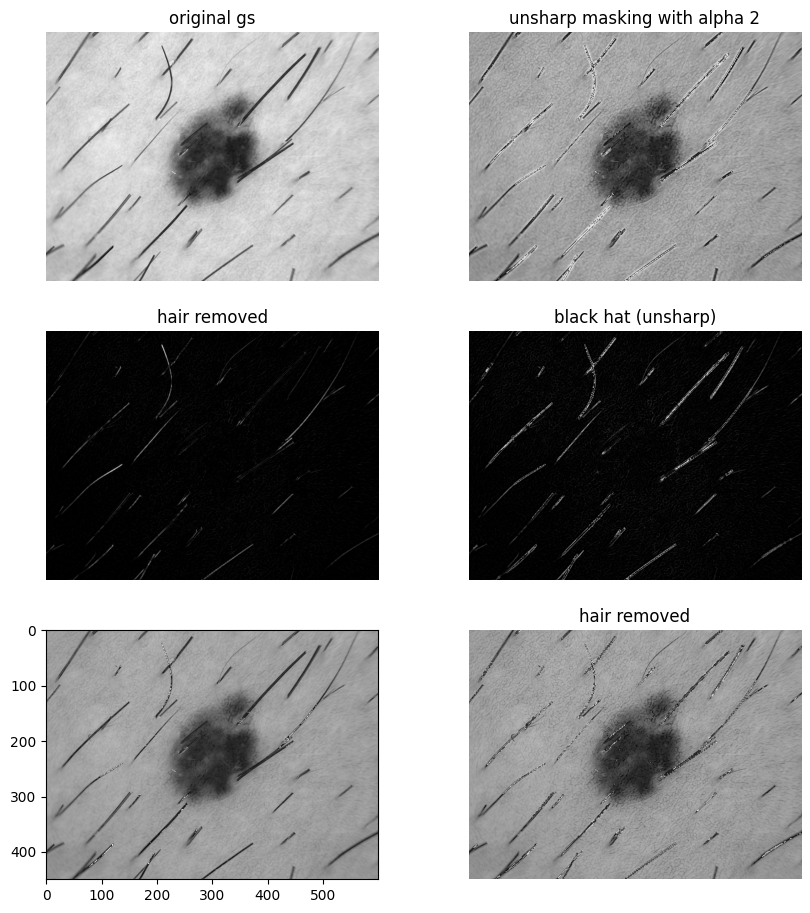

In [15]:
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

filterSize =(3, 3)

# unsharp masking
alpha = 2
gaussian_img = cv2.GaussianBlur(image_gs,(0,0), 2.0)
image_gs_unsharp = image_gs + alpha * (image_gs - gaussian_img)

f, ax = plt.subplots(3, 2, figsize=(10,11))
ax[0, 0].imshow(image_gs, cmap='gray')
ax[0, 0].axis('off')
ax[0, 0].set_title("original gs")
ax[0, 1].imshow(image_gs_unsharp, cmap='gray')
ax[0, 1].axis('off')
ax[0, 1].set_title(f"unsharp masking with alpha {alpha}")

# black top-hat

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

tophat_img_gs = cv2.morphologyEx(image_gs, cv2.MORPH_BLACKHAT, kernel)
tophat_img_gs_unshharp = cv2.morphologyEx(image_gs_unsharp, cv2.MORPH_BLACKHAT, kernel)

ax[1, 0].imshow(tophat_img_gs, cmap='gray')
ax[1, 0].axis('off')
ax[1, 0].set_title("black hat")
ax[1, 1].imshow(tophat_img_gs_unshharp, cmap='gray')
ax[1, 1].axis('off')
ax[1, 1].set_title("black hat (unsharp)")

ax[2, 0].imshow(image_gs - tophat_img_gs, cmap='gray')
ax[1, 0].axis('off')
ax[1, 0].set_title("hair removed")
ax[2, 1].imshow(image_gs - tophat_img_gs_unshharp, cmap='gray')
ax[2, 1].axis('off')
ax[2, 1].set_title("hair removed")

plt.show()
